In [27]:
%matplotlib inline
import matplotlib.style as style

import matplotlib.pyplot as plt
import numpy as np

# import scqubits as scq
# scq.settings.PROGRESSBAR_DISABLED = True
# import qutip as qt

style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [28]:
hbar = 1
h = hbar*2*np.pi
qe = 1

# Unit conversions
MHz = 10.0**(-3)
GHz = 1.0
kHz = 10.0**(-6)
us = 10.0**3
ns = 1.0

In [29]:
def EJ_flux(EJ1, EJ2, flux):
    # flux in units of Phi0=h/2e
    d = (EJ1-EJ2)/(EJ1+EJ2) 
    return (EJ1+EJ2)*np.sqrt(np.cos(np.pi*flux)**2 + d**2 * np.sin(np.pi*flux)**2)

In [30]:
def transmon_0n(n, EC, EJ):
    # energy to level n from ground state
    return np.sqrt(8*EC*EJ)*n - EC/12 * (6*n**2 + 6*n +3) + EC/4

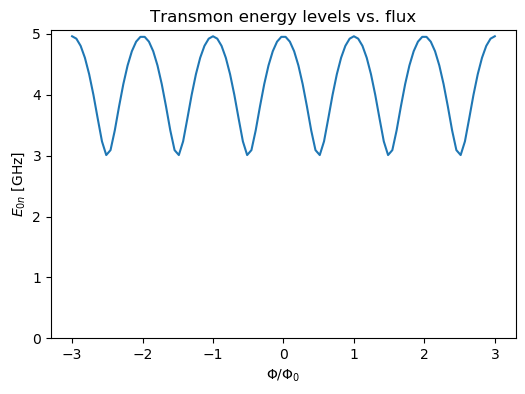

In [37]:
flux_arr = np.linspace(-3, 3, 100)
EC = 0.10*GHz
EJ1 = 22 * GHz
EJ2 = 10 * GHz

# transmon_consts = dict(
#     EC=EC,
#     EJmax=EJ1+EJ2,
#     d=(EJ1-EJ2)/(EJ1+EJ2),
#     flux=0.0,
# )

# transmon = scq.TunableTransmon(
#     **transmon_consts,
#     ng=0,
#     ncut = 110,
#     truncated_dim = 5
# )

# evals_count = 5
# cutoff = evals_count

# evals, evecs = transmon.eigensys(evals_count=evals_count)
# evals = evals - evals[0] # set ground state energy to 0

# alpha = evals[2]-2*evals[1]

plt.plot(flux_arr, transmon_0n(1, EC, EJ_flux(EJ1, EJ2, flux_arr)), label=r'$\omega_{01}')
# plt.plot(flux_arr, transmon_0n(2, EC, EJ_flux(EJ1, EJ2, flux_arr)), label=r'$\omega_{02}')
plt.title('Transmon energy levels vs. flux')
plt.xlabel(r'$\Phi/\Phi_0$')
plt.ylabel('$E_{0n}$ [GHz]')
plt.ylim(0, None)
plt.show()
